HATE SPEECH DETECTION

In [5]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("train.csv")
print(dataset)

       count  hate_speech_count  offensive_language_count  neither_count  \
0          3                  0                         0              3   
1          3                  0                         3              0   
2          3                  0                         3              0   
3          3                  0                         2              1   
4          6                  0                         6              0   
...      ...                ...                       ...            ...   
24778      3                  0                         2              1   
24779      3                  0                         1              2   
24780      3                  0                         3              0   
24781      6                  0                         6              0   
24782      3                  0                         0              3   

       class                                              tweet  
0          2  !!! RT 

In [6]:
dataset.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [8]:
dataset.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [9]:
dataset["labels"] = dataset["class"].map({0: "Hate speech",
                                1: "offensive language",
                                2: "no hate or offensive language"})
print(dataset)

       count  hate_speech_count  offensive_language_count  neither_count  \
0          3                  0                         0              3   
1          3                  0                         3              0   
2          3                  0                         3              0   
3          3                  0                         2              1   
4          6                  0                         6              0   
...      ...                ...                       ...            ...   
24778      3                  0                         2              1   
24779      3                  0                         1              2   
24780      3                  0                         3              0   
24781      6                  0                         6              0   
24782      3                  0                         0              3   

       class                                              tweet  \
0          2  !!! RT

Partition of the dataset on the bases of offensive and non-offensive language

Now dividing it into the following categories Tweets and Labels

In [10]:
data = dataset[[ "tweet", "labels" ]]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",no hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


Downloading the nltk and stopwords from it

In [11]:
import re 
import nltk
nltk.download('stopwords')
import string
#import stop words
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
#import stemming
stemmer = nltk.SnowballStemmer("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Making the function for cleaning the tweets as there are many unneeded words symbols in tweets

In [12]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_data(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = ' '.join([word for word in text.split(' ') if word not in stopwords])
    text = ' '.join([stemmer.stem(word) for word in text.split(' ')])
    return text


In [13]:
df = dataset[["tweet", "labels"]]

Applying clean function on the dataset

In [14]:
df.loc[:, "tweet"] = df["tweet"].apply(clean_data)
print(df)

                                                   tweet  \
0       rt mayasolov woman shouldnt complain clean ho...   
1       rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2       rt urkindofbrand dawg rt  ever fuck bitch sta...   
3                 rt cganderson vivabas look like tranni   
4       rt shenikarobert shit hear might true might f...   
...                                                  ...   
24778  you muthafin lie   coreyemanuel right tl trash...   
24779  youv gone broke wrong heart babi drove redneck...   
24780  young buck wanna eat dat nigguh like aint fuck...   
24781                     youu got wild bitch tellin lie   
24782  ruffl  ntac eileen dahlia  beauti color combin...   

                              labels  
0      no hate or offensive language  
1                 offensive language  
2                 offensive language  
3                 offensive language  
4                 offensive language  
...                              ...  
24778 

In [15]:
X = np.array(df["tweet"])
Y = np.array(df["labels"])

In [16]:
print(X)

[' rt mayasolov woman shouldnt complain clean hous amp man alway take trash'
 ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place'
 ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit' ...
 'young buck wanna eat dat nigguh like aint fuckin di'
 'youu got wild bitch tellin lie'
 'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll ']


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [18]:
cv = CountVectorizer()
x = cv.fit_transform(X)

In [19]:
print(x)

  (0, 18920)	1
  (0, 14025)	1
  (0, 24856)	1
  (0, 19957)	1
  (0, 4413)	1
  (0, 4109)	1
  (0, 9936)	1
  (0, 636)	1
  (0, 13750)	1
  (0, 547)	1
  (0, 21593)	1
  (0, 22922)	1
  (1, 18920)	1
  (1, 2639)	1
  (1, 5244)	2
  (1, 4302)	1
  (1, 6400)	1
  (1, 1401)	1
  (1, 4925)	1
  (1, 9665)	1
  (1, 17132)	1
  (2, 18920)	2
  (2, 23678)	1
  (2, 5288)	1
  (2, 6920)	1
  :	:
  (24780, 24188)	1
  (24780, 6460)	1
  (24780, 7957)	1
  (24780, 5649)	1
  (24780, 15605)	1
  (24780, 2994)	1
  (24781, 2129)	1
  (24781, 8669)	1
  (24781, 12905)	1
  (24781, 24707)	1
  (24781, 21857)	1
  (24781, 25480)	1
  (24782, 636)	1
  (24782, 24591)	1
  (24782, 25305)	1
  (24782, 1734)	1
  (24782, 4338)	1
  (24782, 16335)	1
  (24782, 17083)	1
  (24782, 4351)	1
  (24782, 18961)	1
  (24782, 15890)	1
  (24782, 6568)	1
  (24782, 5073)	1
  (24782, 4313)	1


TRAINING the model with train dataset and keeping the test dataset as 33% of the dataset

In [20]:
x_train, x_test, y_train,y_test = train_test_split(x ,Y ,test_size=0.33, random_state=42)
x_train
x_test

<8179x25684 sparse matrix of type '<class 'numpy.int64'>'
	with 65237 stored elements in Compressed Sparse Row format>

USING DECISION TREE CLASSIFIER

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [22]:
y_pred = dt.predict(x_test)

In [23]:
# confusion matrix and accuaracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,  y_pred)
cm

array([[ 153,   38,  274],
       [  30, 1157,  192],
       [ 224,  243, 5868]], dtype=int64)

The above confusion matrix gives us how the predictions are predicted

In [24]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline


<Axes: >

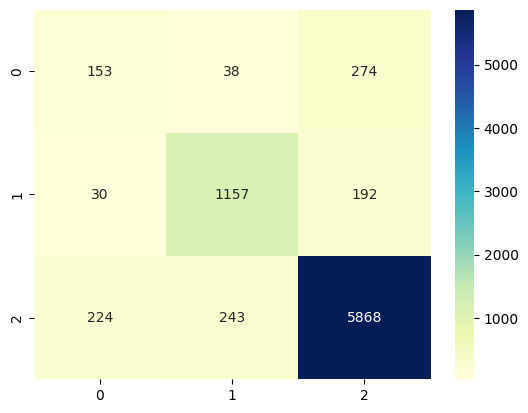

In [25]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8776134001711701

Accuracy is 87.76% which is good can be more using different methods but will work currently

In [27]:
sample = "let's unite and kill all the people who are protesting against the government."
sample_cleaned = clean_data(sample)
print(sample_cleaned)

let unit kill peopl protest govern


In [32]:
data1= cv.transform([sample_cleaned]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
dt.predict(data1)

array(['Hate speech'], dtype=object)

Even with not so good accuracy the model was able to predict the hate speech correctly which is good.

Conclusions the model is able to predict the hate speech correctly and giving good accuracy over the test dataset